Name - **Shubhank Kulshreshtha** \
Class - **CSE B**  \  
Rollno. - **197276**\

---


# 1. Write a python program to implement Logistic Regression for multiclass classification from scratch using the following dataset.
Link: https://www.kaggle.com/uciml/iris

In [2]:
import numpy as np
import io
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from google.colab import files  
uploaded = files.upload()

data = pd.read_csv(io.BytesIO(uploaded['Iris.csv']))
data = data.sample(frac=1)
data = data.drop('Id',axis=1)
data.head()

Saving Iris.csv to Iris (1).csv


SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm          Species
140            6.7           3.1            5.6           2.4   Iris-virginica
146            6.3           2.5            5.0           1.9   Iris-virginica
4              5.0           3.6            1.4           0.2      Iris-setosa
86             6.7           3.1            4.7           1.5  Iris-versicolor
123            6.3           2.7            4.9           1.8   Iris-virginica

In [4]:
data=np.array(data) 
X=data[:,:-1]
Y=data[:,-1]
y_unique=np.unique(Y)
print(y_unique)
for i in range (len(Y)):
  Y[i]=list(y_unique).index(Y[i])
Y=Y.astype('int32')
print(Y.dtype)

['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']
int32


In [5]:
# splitting the dataset into train and test
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
X=preprocessing.scale(X)
x_train, x_test, y_train, y_test = train_test_split(X,Y, test_size = 0.2)

In [6]:
def one_hot(y,c):
    #encoding y as a matrix in which the correct ans is 1.
    y_hot = np.zeros((len(y), c))
    y_hot[np.arange(len(y)), y] = 1
    return y_hot

In [7]:
# multiclass classification
def softmax(z):
    exp = np.exp(z - np.max(z))
    for i in range(len(z)):
        exp[i] /= np.sum(exp[i])
    return exp

In [8]:
#gradient function
def gradients(X, y, y_hat):
    m = X.shape[0]
    # Gradient w.r.t weights.
    dw = (1/m)*np.dot(X.T, (y_hat - y))
    # Gradient w.r.t bias.
    db = (1/m)*np.sum((y_hat - y)) 
    return dw, db

In [9]:
#implementing the training function
def train(X, y,epochs,c,lr): 
    m, n = X.shape
    w = np.zeros((n,c))
    b = 0
    losses = []
    # running iterations
    for epoch in range(epochs):
            z=np.dot(X,w)+b
            y_hat = softmax(z)
            y_hot=one_hot(y,c)
            dw, db = gradients(X, y_hot, y_hat)
            w -= lr*dw
            b -= lr*db
            loss = -np.mean(np.log(y_hat[np.arange(len(y)), y]))
            losses.append(loss)
    plt.plot(np.arange(1,epochs),losses[1:])
    plt.xlabel("number of epoch")
    plt.ylabel("loss")
    return w, b

In [10]:
def predict(X, w, b):
    z = np.dot(X,w) + b
    y_hat = softmax(z)
    return np.argmax(y_hat, axis=1)

3
int32


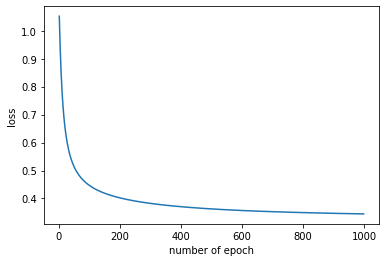

In [11]:
# training
c=len(y_unique)
print(c)
print(y_train.dtype)
w,b=train(x_train,y_train,1000,c,0.05)

In [12]:
#testing on test data
y_pred=predict(x_test,w,b)
print(y_pred)
print(y_test)

[0 1 0 1 1 2 0 0 2 2 2 1 1 0 2 2 1 0 0 1 2 0 1 0 0 2 0 1 2 2]
[0 1 0 1 1 2 0 0 2 2 1 1 1 0 1 1 1 0 0 1 2 0 1 0 0 2 0 2 2 1]


In [13]:
#calculating the accuracy
cnt=0
correct=0
for i in range(np.size(y_pred)):
  if(y_test[i]==y_pred[i]):
    correct+=1
  cnt+=1
accuracy=correct/cnt
print("Accuracy: ",accuracy*100)

Accuracy:  83.33333333333334


-----------------------------------------

# **2**. Write a python program to implement Support Vector Machines (SVM) for Linear and Polynomial kernel from scratch using the following dataset.
Link:
https://www.kaggle.com/uciml/iris [Iris dataset has three classes, remove any one of the
classes and use the dataset]

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [15]:
from google.colab import files  
uploaded = files.upload()

data = pd.read_csv(io.BytesIO(uploaded['Iris.csv']))
data=data.drop('Id',axis=1)
data.head()

Saving Iris.csv to Iris (2).csv


SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0            5.1           3.5            1.4           0.2  Iris-setosa
1            4.9           3.0            1.4           0.2  Iris-setosa
2            4.7           3.2            1.3           0.2  Iris-setosa
3            4.6           3.1            1.5           0.2  Iris-setosa
4            5.0           3.6            1.4           0.2  Iris-setosa

In [ ]:
data=np.array(data) 
X=data[:100,:-1]
# species will be the dependent variable and the remaining will be independent 
Y=data[:100,-1]
y_unique=np.unique(Y)
print(y_unique)
for i in range (len(Y)):
  Y[i]=list(y_unique).index(Y[i])
Y=Y.astype('int32')
Y=np.array(Y)
Y=np.where(Y<=0,-1,1)
print(Y.dtype)
from sklearn import preprocessing
X=preprocessing.scale(X)
print(np.shape(X));

['Iris-setosa' 'Iris-versicolor']
int64
(100, 4)


In [16]:
# splitting the dataset into train and test data
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X,Y, test_size = 0.2,random_state=42)

In [17]:
# training function
def train(X,y,epochs,lr,l):
  m,n=X.shape
  w=np.zeros(n)
  b=0
  for _ in range(epochs):
    for i,x in enumerate(X):
      condition=y[i]*(np.dot(x,w)-b)>=1
      if condition:
        w-=lr*(2*l*w)
      else:
        w-=lr*(2*l*w-np.dot(x,y[i]))
        b=lr*y[i]
  return w,b




In [18]:
def predict(X,w,b):
  y_pred=np.dot(X,w)-b
  return np.sign(y_pred)
  

In [19]:
# training
w,b=train(x_train,y_train,1000,0.1,0.001)

In [20]:
#testing on test data
y_pred=predict(x_test,w,b)
print(y_pred)
print(y_test)

[ 1.  1. -1. -1. -1.  1.  1. -1.  1.  1.  1.  1. -1.  1.  1.  1. -1. -1.
  1.  1.  1.  1.  1.  1.  1. -1.  1. -1.  1. -1.]
[1 2 0 0 0 2 2 0 2 2 2 2 0 1 2 1 0 0 2 2 1 1 2 2 1 0 1 0 1 0]


In [22]:
# accuracy calculation
cnt=0
correct=0
for i in range(np.size(y_pred)):
  if(y_test[i]==y_pred[i]):
    correct+=1
  cnt+=1
accuracy=correct/cnt
print("Accuracy: ",accuracy*100)

Accuracy:  26.666666666666668
